## Assignment : K Nearest Neighbor classifiction for the Glass dataset


### Glass Identification Dataset:

Attribute Information:

   	1. Id number: 1 to 214
   	2. RI: refractive index
   	3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   	4. Mg: Magnesium
   	5. Al: Aluminum
   	6. Si: Silicon
   	7. K: Potassium
   	8. Ca: Calcium
   	9. Ba: Barium
  	10. Fe: Iron
  	11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps
      
You can download the dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/glass+identification)

#### Procedure:

1. Load libraries/ data

	- Load and explore the shape of the dataset

2. Summarize Data

	- Descriptive statistics
	- Correlation matrix
	- Univariate and bivariate analysis and visualizations
	
	**`What did you understand about data?`**

3. Data Preparation:

	- Data Cleaning: Do you need to clean the data?
	- Split-out validation dataset
	- Data transformation

4. Baseline model: train a KNN classifier to serve as the baseline. 

5. Parameter tuning with cross validation:

	Obviously, the best **K** is the one that corresponds to the **lowest test 	error rate**, so let’s suppose we carry out repeated measurements of the test 	error for different values of K. 

	However, what we are doing is using the test set as a training set! This means that we are underestimating the true error rate since our model has been forced to fit the test set in the best possible manner. 
	
	Our model is then incapable of generalizing to newer observations, a process known as **overfitting**. So, touching the test set is out of the question and must only be done at the very end of our pipeline.
	
	`Using the test set for hyperparameter tuning can lead to overfitting.`
	
	**An alternative and smarter approach involves estimating the test error rate by holding out a subset of the training set from the fitting process.**

	**This subset, called the validation set, can be used to select the appropriate level of flexibility of our algorithm!**
	
	**There are different validation approaches that are used in practice, and we will be exploring one of the more popular ones called k-fold cross validation.**
	
	![cross-validation](https://kevinzakka.github.io/assets/k_fold_cv.jpg)
	
	As seen in the image, k-fold cross validation (the k is totally unrelated to K) involves randomly dividing the training set into k groups, or folds, of approximately equal size. 
	
	The first fold is treated as a validation set, and the method is fit on the remaining k−1 folds. The misclassification rate is then computed on the observations in the held-out fold. 
	
	This procedure is repeated k times; each time, a different group of observations is treated as a validation set. This process results in k estimates of the test error which are then averaged out. The code in below will help you to calculate the scores using k-fold cross validation.
		
	```
	from sklearn.model_selection import cross_val_score
	# creating odd list of K for KNN
	 k_list= list(range(1,50))
	
	# subsetting just the odd ones
	neighbors = filter(lambda x: x % 2 != 0, k_list)
	
	# empty list that will hold cv scores
	cv_scores = []
	
	# perform 10-fold cross validation
	for k in neighbors:
	    knn = KNeighborsClassifier(n_neighbors=k)
	    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
	    cv_scores.append(scores.mean())
	
	```

	As we can see above, scikit-learn comes in handy with its cross_val_score() method. We specifiy that we are performing 10 folds with the cv=10 parameter and that our scoring metric should be accuracy since we are in a classification setting.
	
	Finally, we plot the misclassification error versus K (Use the code below). 
	
	
	```
	# changing to misclassification error
	MSE = [1 - x for x in cv_scores]
	
	# determining best k
	optimal_k = neighbors[MSE.index(min(MSE))]
	print "The optimal number of neighbors is %d" % optimal_k
	
	# plot misclassification error vs k
	plt.plot(neighbors, MSE)
	plt.xlabel('Number of Neighbors K')
	plt.ylabel('Misclassification Error')
	plt.show()
	
	```
	** What would be the best value of K to choose??? Why? **




6. Apply Diagnostics:

 - A simple and effective way to remedy skewed class distributions is by implementing weighed voting. The class of each of the K neighbors is multiplied by a weight proportional to the inverse of the distance from that point to the given test point. This ensures that nearer neighbors contribute more to the final vote than the more distant ones. How can you do this in Sklean Knearestneighbor class?
 
- Changing the distance metric for different applications may help improve the accuracy of the algorithm. Which of other distance measures can you try? Do hem improve your model?

- Rescaling your data makes the distance metric more meaningful. For instance, given 2 features height and weight, an observation such as x=[180,70] will clearly skew the distance metric in favor of height. One way of fixing this is by column-wise subtracting the mean and dividing by the standard deviation. Scikit-learn’s normalize() method can come in handy. would this improve the results? How can you do this in Sklearn?

- Use Dimensionality reduction techniques like PCA:

	[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
		
	```
	from sklearn.decomposition import PCA
	```

-  should be executed prior to appplying KNN and help make the distance metric more meaningful.


After applying and testing for these diagnostics, how the model performance has improved? What is the final confusion matric that you can share? What is overall accuracy of the model?

### 1. Load libraries/ data

In [375]:
# import the required packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats


#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [365]:
glass_df = np.genfromtxt('./glass.data', delimiter=',')
glass_df = pd.DataFrame(glass_df, columns = ['id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type'])

### 2. Summarize Data

In [366]:
glass_df.describe()

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [367]:
glass_df = glass_df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']]

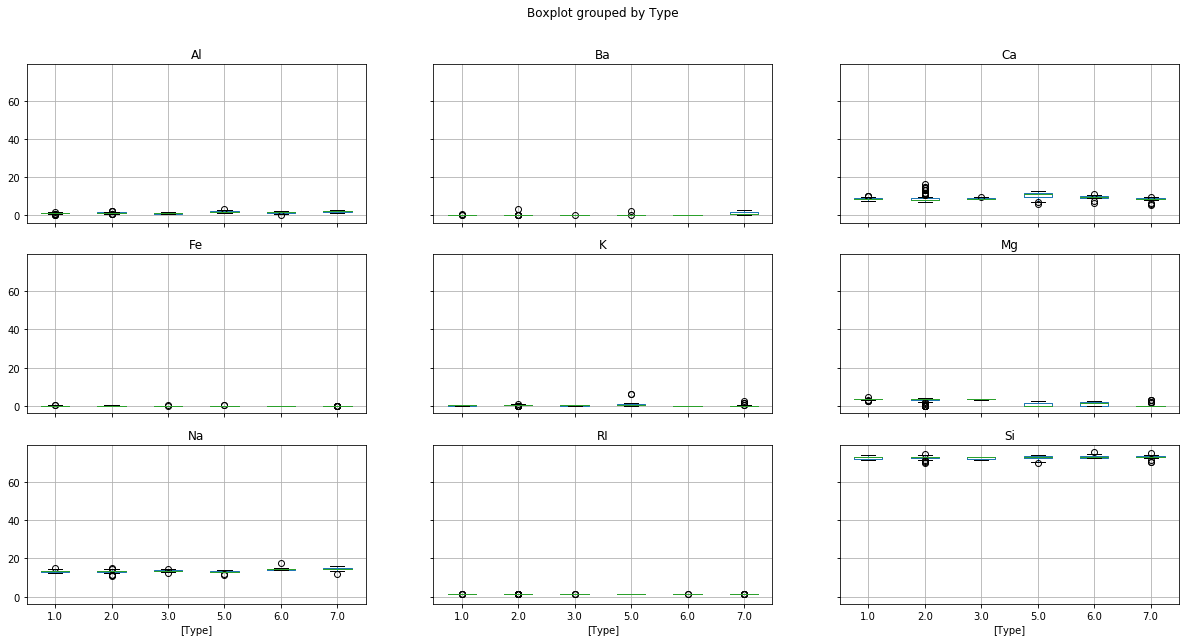

In [370]:
ax = glass_df.boxplot(by="Type", figsize=(20, 10))
plt.show()

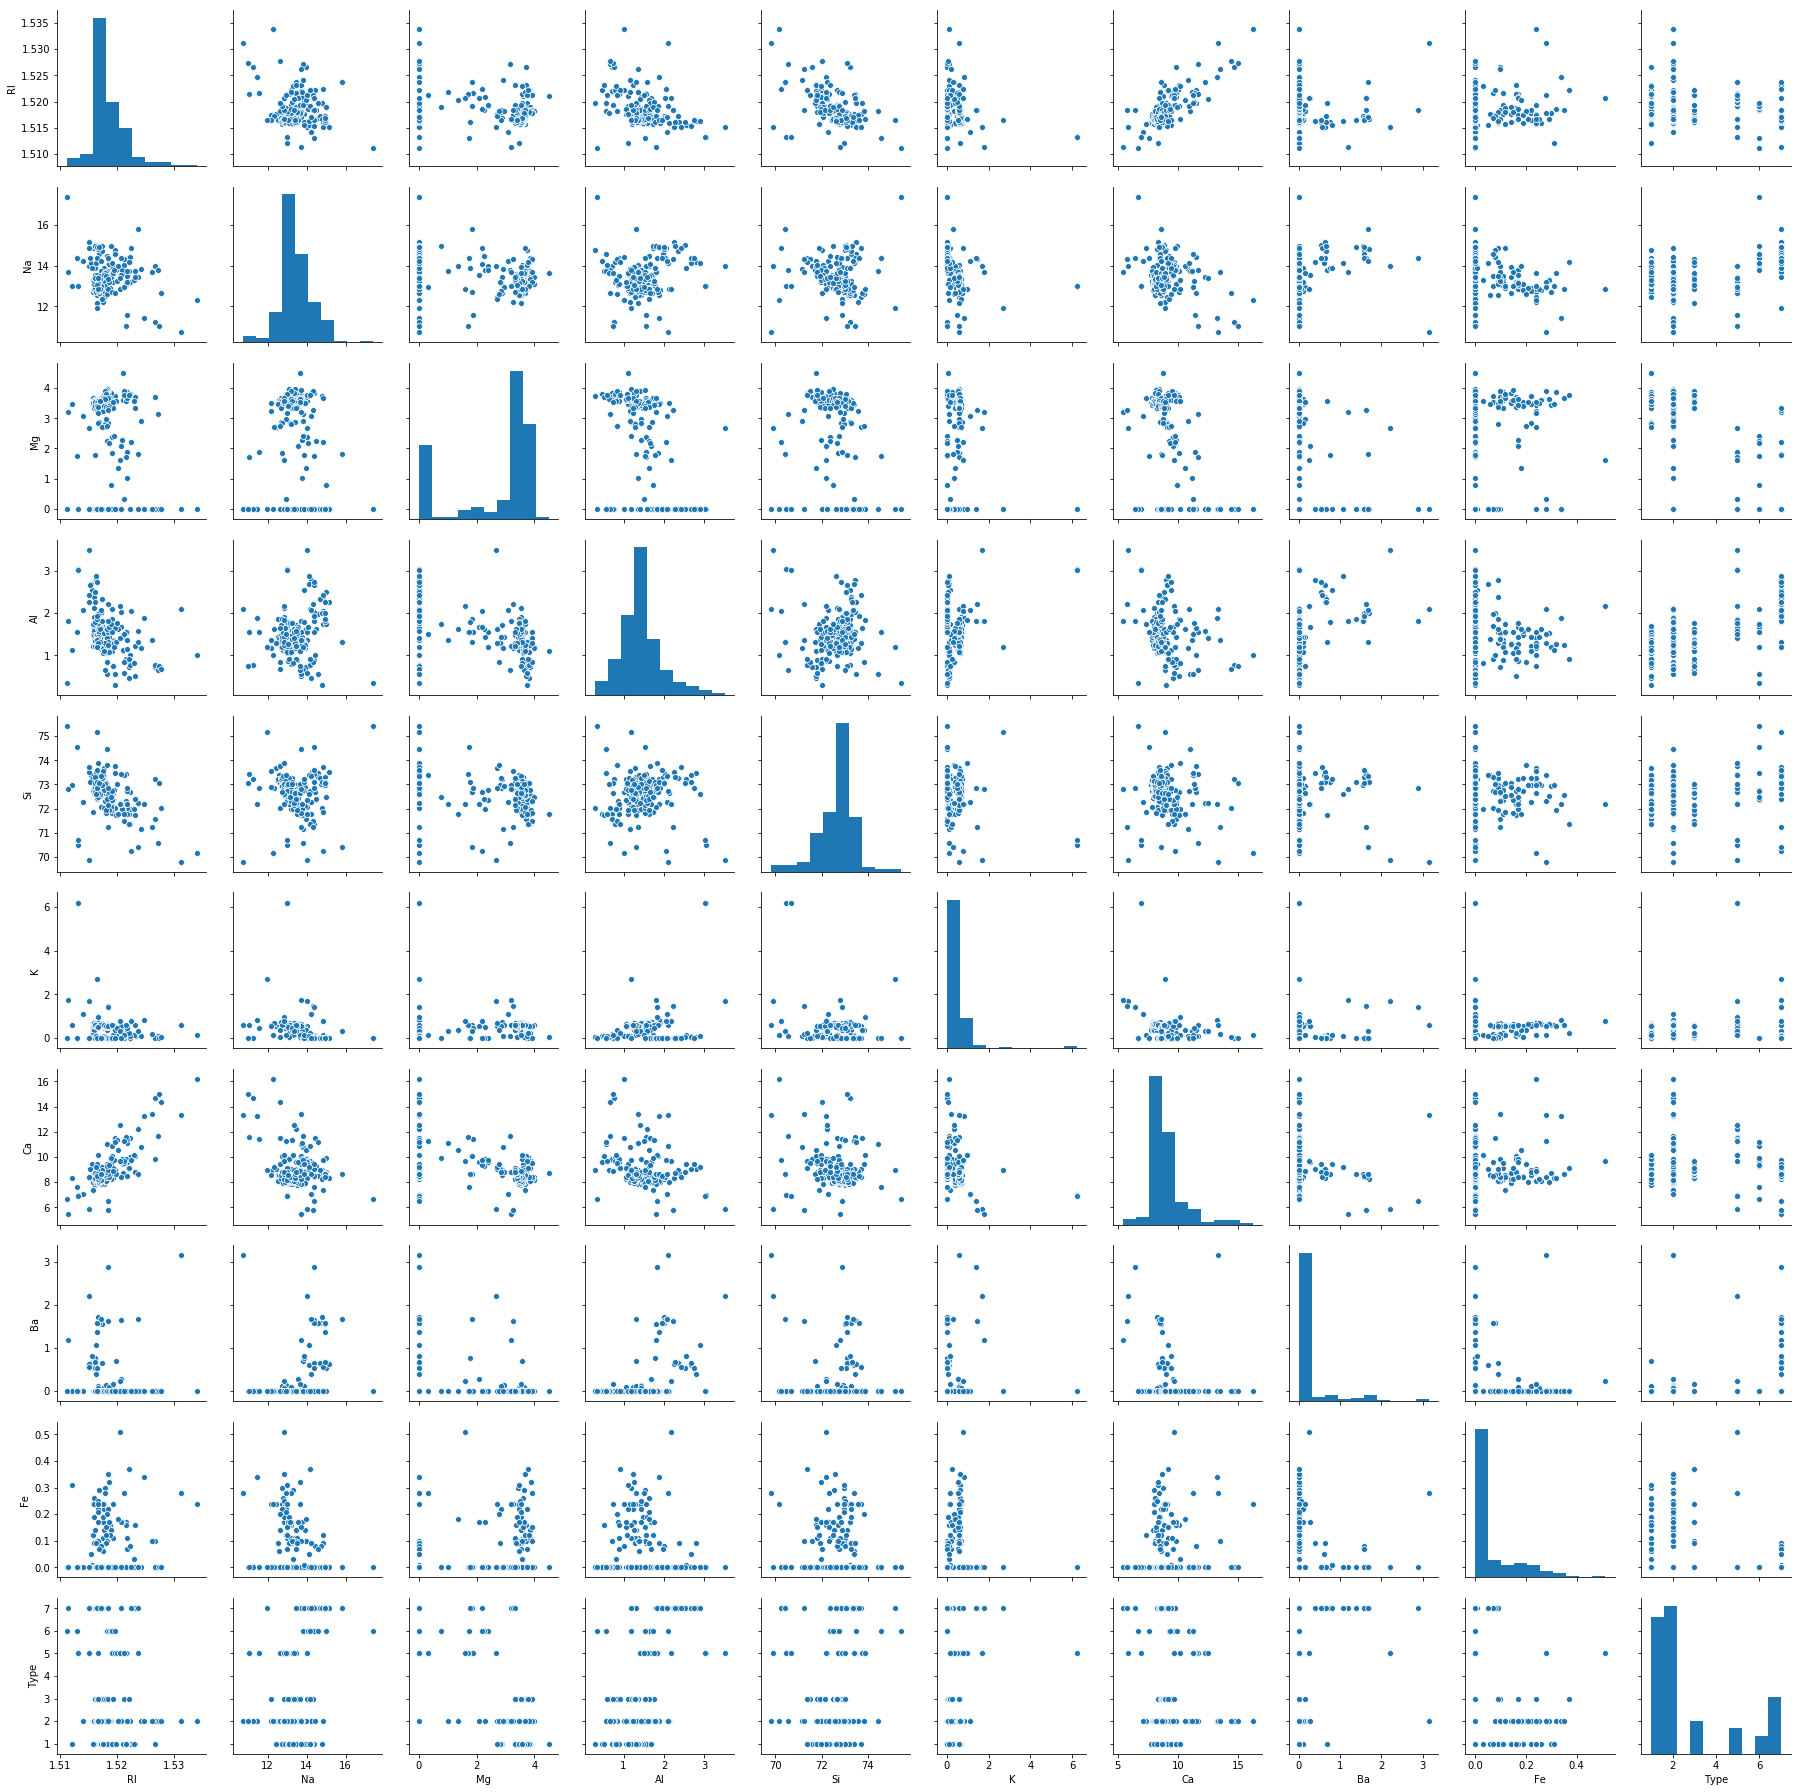

In [371]:
sns.pairplot(glass_df)

In [372]:
mapping = {1: 'building_windows_float_processed',
           2: 'building_windows_non_float_processed',
           3: 'vehicle_windows_float_processed',
           4: 'vehicle_windows_non_float_processed',
           5: 'containers',
           6: 'tableware',
           7: 'headlamps'}

glass_df = glass_df.replace({'Type': mapping})

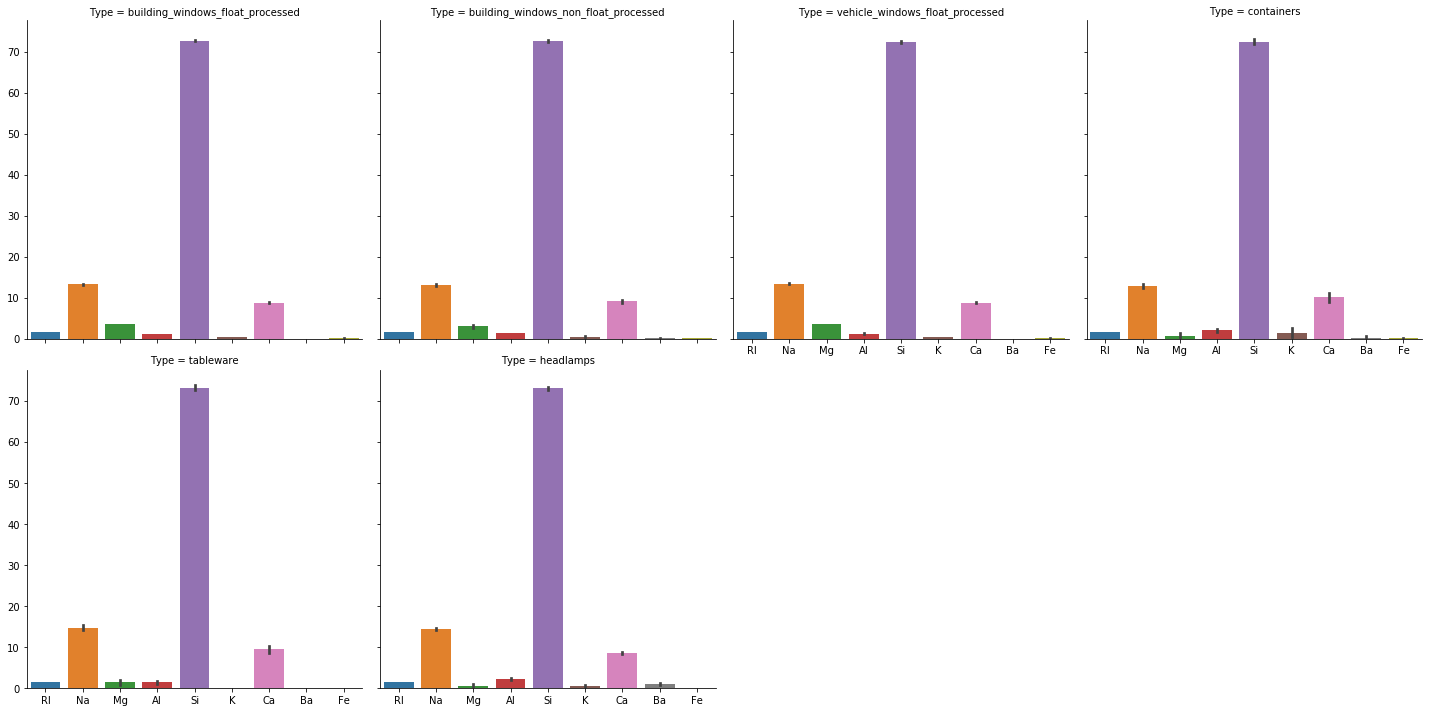

In [373]:
sns.catplot(kind='bar', 
              data=glass_df, 
              col='Type',
              col_wrap = 4)

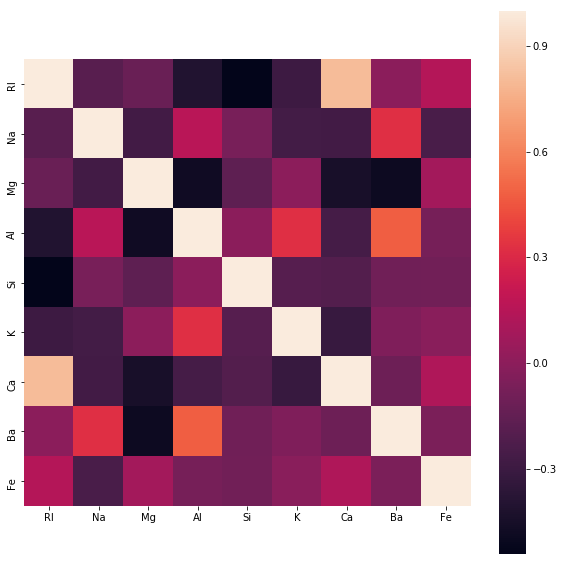

In [380]:
plt.figure(figsize=(10,10))
sns.heatmap(glass_df.corr(), vmax=1, square=True)

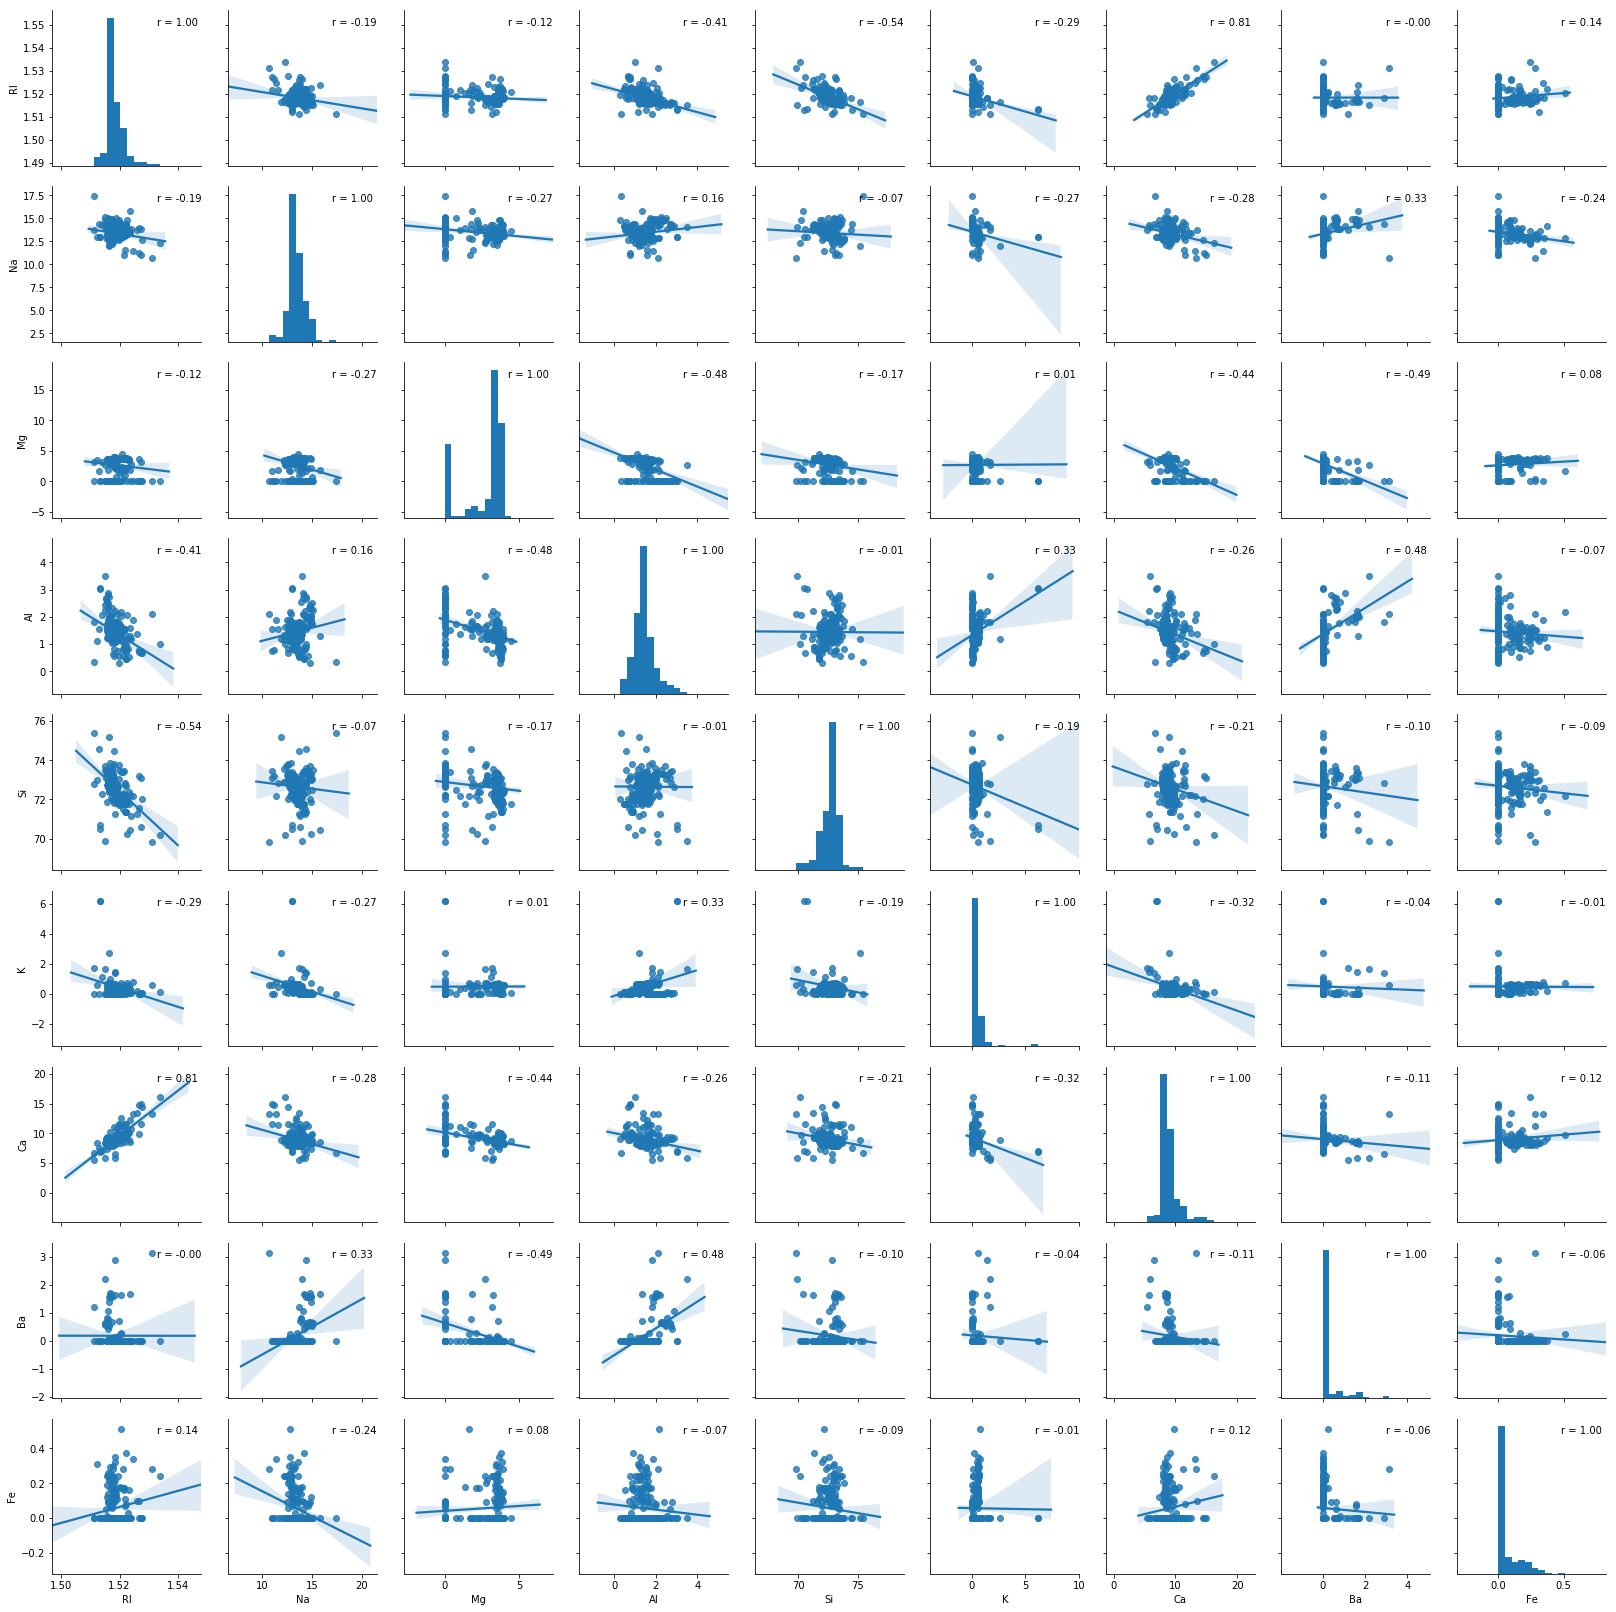

In [377]:
def corrfunc(x, y, **kws):
    (r, p) = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.7, .9), xycoords=ax.transAxes)

ax = sns.pairplot(glass_df, kind='reg')
ax.map(corrfunc)

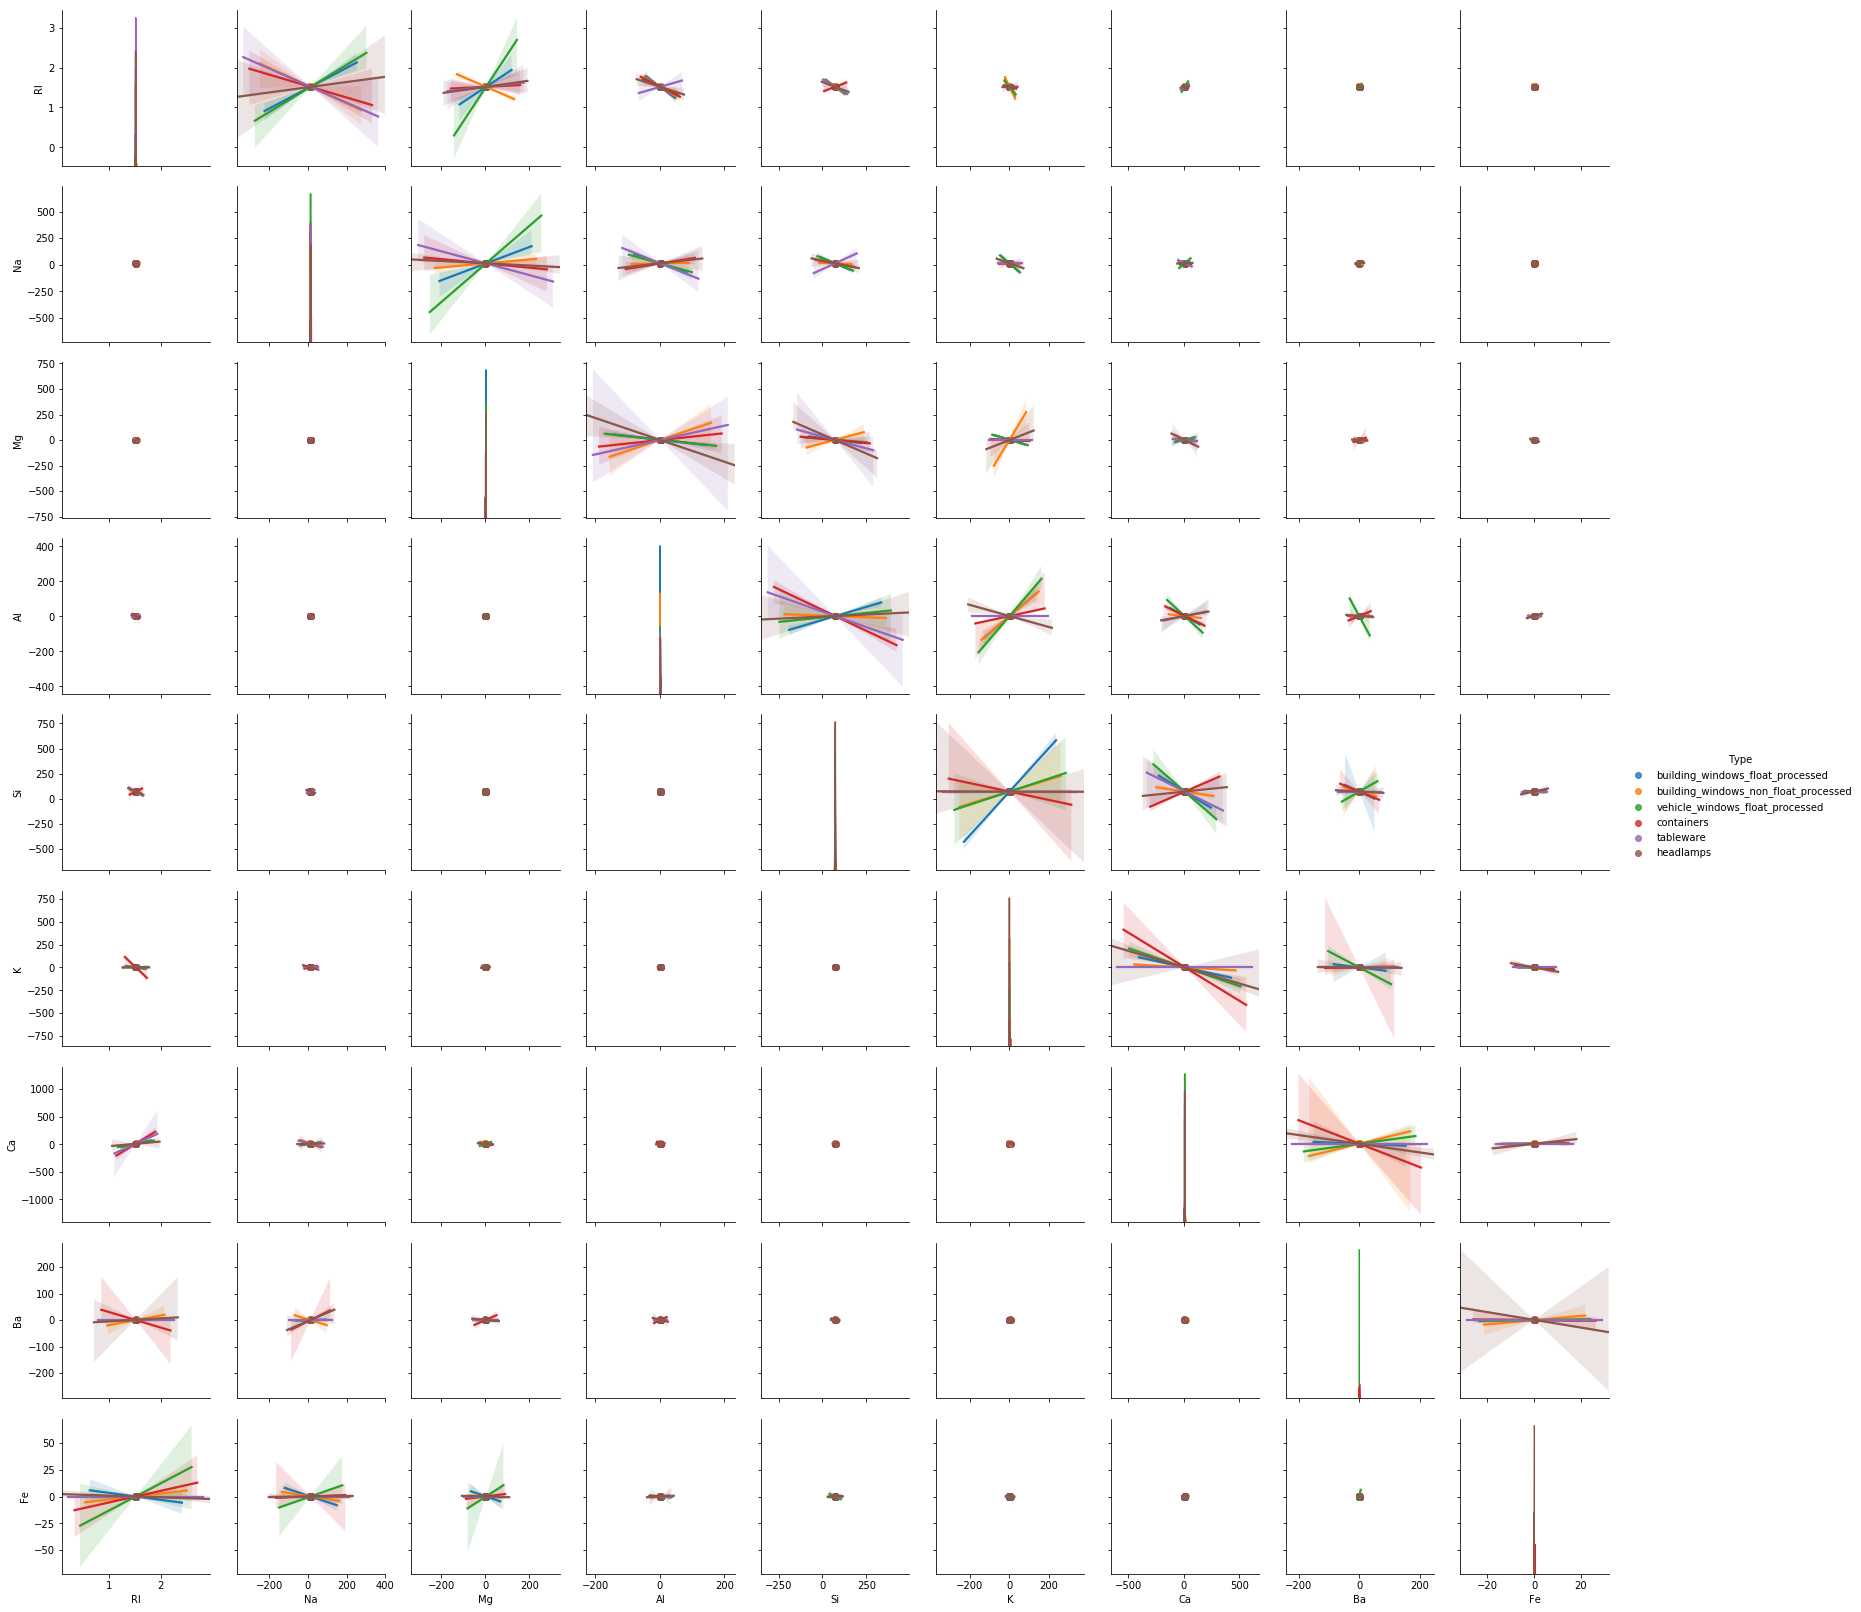

In [379]:
ax = sns.pairplot(glass_df, kind='reg', hue='Type')

#### What did you understand about data?

From the pairplot observatons, there is a different content of each element for each type of glass. However for all types of glass, the content difference is not very significant - same with the difference in refractive index. 

All types of glass shown here contain Silicon the most, followed by Sodium and Calcium. 

Looking at the heatmap, the refractive index is quite correlated to Calcium Oxide content of the glass. Aluminum content is also slightly positively correlated to both Barium and Potassium content. 

When looking at the pairplot separated by types, we can interestingly see the correlations between the elements for each type of glass. In vehicle windows for instance, Magnesium is very positively correlated to both Sodium and refractive index. In building windows, Potassium is very positively correlated with Silicon.

### 3. Data Preparation

In [739]:
glass_df = np.genfromtxt('./glass.data', delimiter=',')
glass_df = pd.DataFrame(glass_df, columns = ['id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type'])

In [740]:
X = glass_df[['Na','Mg','Al','Si','K','Ca','Ba','Fe']]
y = glass_df['Type']

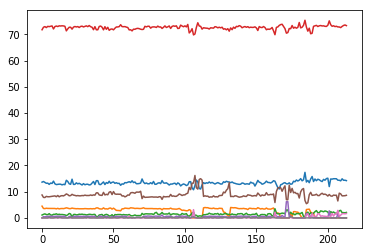

In [741]:
plt.plot(X)

### 4. Baseline model: train a KNN classifier to serve as the baseline

In [742]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [743]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [744]:
y_pred = knn.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.60
Misclassified samples: 17


### 5. Parameter tuning with cross validation

In [745]:
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn, X_train, y_train, cv=4).mean()
    print(i, score)

1 0.7086605255209906
2 0.6844357193194404
3 0.6726630927212323
4 0.6142278264371288
5 0.6199096446189469
6 0.6196390818483842
7 0.6430396154233363
8 0.6193748112352764
9 0.6193748112352764
10 0.6365524010872848


The optimal number of neighbors is 1


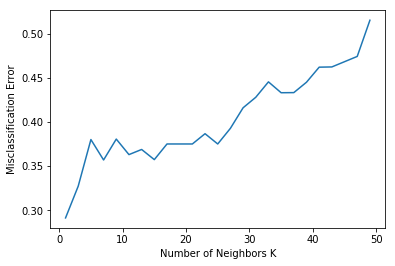

In [746]:
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
k_list= list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, k_list))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=4, scoring='accuracy')
    cv_scores.append(scores.mean())
    
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#### What would be the best value of K to choose??? Why?

The best value of K to choose here without parameter tuning is actually 1. This is because the dataset is quite small, so the smaller nearest neighbor K value will provide a better accuracy for the algorithm. However with a small K value, the algorithm is actually overfitting this small dataset, so forward predictions out-of-sample will unlikely be accurate.

### 6. Apply Diagnostics

In [1132]:
from sklearn.preprocessing import normalize

In [1133]:
X_norm = normalize(X)
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2)

The optimal number of neighbors is 3


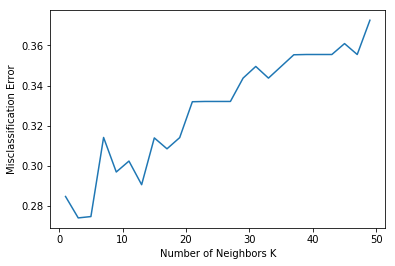

[0.7152182940921565,
 0.7258925562135876,
 0.7252157662862921,
 0.6858147960903269,
 0.7030159131397756,
 0.69758113053108,
 0.709347464971833,
 0.6860347753863932,
 0.6914695579950889,
 0.6858963479223844]

In [1136]:
# Euclidean is default distance metric
# Here, with distance weights

k_list= list(range(1,50))
neighbors = list(filter(lambda x: x % 2 != 0, k_list))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train, y_train, cv=4, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
cv_scores[0:10]

The optimal number of neighbors is 3


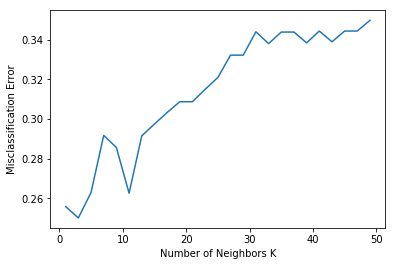

[0.7441857455823583,
 0.7498612716067216,
 0.7370597404785979,
 0.7083122682844624,
 0.7144030767008522,
 0.737418147238673,
 0.7085322475805287,
 0.7025798666281476,
 0.6967659131397757,
 0.69133113053108]

In [1137]:
k_list= list(range(1,50))
neighbors = list(filter(lambda x: x % 2 != 0, k_list))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan',weights='distance')
    scores = cross_val_score(knn, X_train, y_train, cv=4, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
cv_scores[0:10]

#### PCA

In [1218]:
from sklearn.decomposition import PCA

In [1285]:
X = glass_df[['Na','Mg','Al','Si','K','Ca','Ba','Fe']]
y = glass_df['Type']

In [1296]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

In [1297]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

In [1298]:
pd.DataFrame(X_train)

,0,1,2,3,4
0,1.294883,0.033299,0.214334,0.913745,0.289553
1,-1.256136,-0.565287,-0.169584,0.148498,0.061830
2,-1.215255,0.028759,0.000912,0.202556,0.002050
3,-0.882595,-0.413350,0.538328,-0.033767,0.098215
4,-1.349977,-0.355428,-0.274249,0.031271,0.001007
5,-0.985387,0.075981,0.393744,-0.306156,0.060874
6,2.121587,2.230007,0.331778,-0.398489,0.196978
7,2.075618,-0.213071,-0.931179,0.316795,-0.347264
8,-1.312466,-0.018402,0.357509,-0.278567,-0.071026
9,-0.948619,-0.440943,0.410718,0.111219,0.195923


The optimal number of neighbors is 1


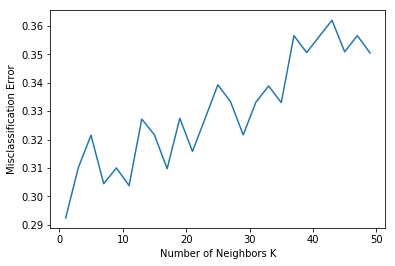

[0.7075531058089197,
 0.6898406825732407,
 0.6784770462096044,
 0.695516208597604,
 0.6899791100372495,
 0.6962020537601933,
 0.6728015201852411,
 0.6783449109030504,
 0.6902496728078124,
 0.6725309574146784]

In [1299]:
k_list= list(range(1,50))
neighbors = list(filter(lambda x: x % 2 != 0, k_list))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan',weights='distance')
    scores = cross_val_score(knn, X_train, y_train, cv=4, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
cv_scores[0:10]

In [1303]:
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=1,metric='manhattan',weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

confusion_matrix(y_test, y_pred)

Accuracy: 0.77
Misclassified samples: 10


array([[17,  0,  1,  0,  0,  0],
       [ 1, 10,  2,  1,  0,  0],
       [ 3,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  4]], dtype=int64)

Text(0.5, 1.0, 'PCA dependencies')

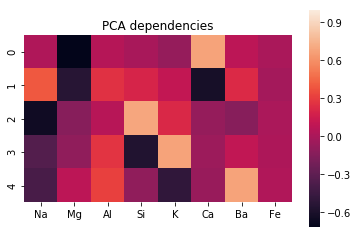

In [1304]:
ax = sns.heatmap(pd.DataFrame(pca.components_,columns=X.columns), vmax=1, square=True)
ax.set_title('PCA dependencies')

#### Conclusion

After some trial and error in parameter tuning, the best KNN metric to use is Manhattan distance with a smaller number of neighbors. Weighted distance voting improves the models slightly for all the different distance metrics, decreasing the mean squared error by about 2-3% on average. 

In terms of scaling data, both normalization and standard-scaling methods were tried. Normalization was a better scaling technique in most of the trials.

Performing PCA on the data also does a good job of scaling. After PCA it was unnecessary to do further normalization on the data to get good performance of the KNN. From the original 8 features of each element of the glass, reducing the features to 5 provides the best optimal performance for the KNN algorithm. 